# Clustering & Optimal Cluster Selection (Simple Guide)

This notebook gives a quick, practical overview of clustering and how to choose the number of clusters (K) in simple terms.


## What is Clustering?

- **Goal**: Group similar data points together without labels (unsupervised learning).
- **Intuition**: Points within the same cluster are close; points in different clusters are far.
- **Popular algorithms**: K-Means, Hierarchical, DBSCAN (we'll focus on K-Means for simplicity).


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)


## Create a Simple Dataset
We'll generate a 2D dataset with clear cluster structure to visualize.


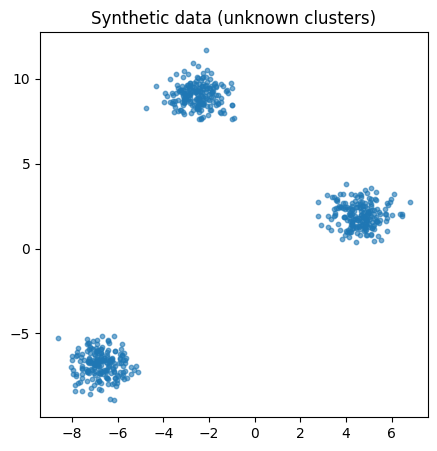

In [2]:
# Generate synthetic data with 3 clusters
X, y_true = make_blobs(n_samples=600, centers=3, cluster_std=0.70, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.6)
plt.title("Synthetic data (unknown clusters)")
plt.show()


## Quick K-Means Demo
We'll try K-Means with K=3 (since we generated 3 clusters) and visualize the result.


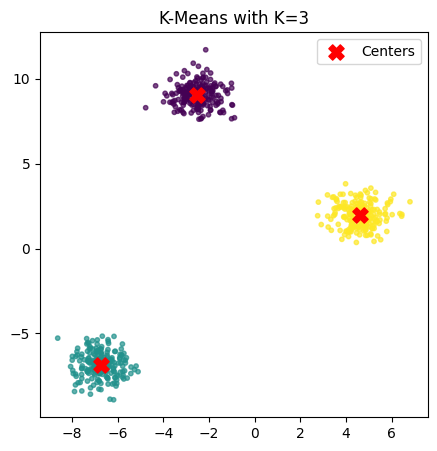

In [3]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=120, marker='X', label='Centers')
plt.title(f"K-Means with K={k}")
plt.legend()
plt.show()


## How to Choose K? (Elbow Method)

- **Idea**: As K increases, clusters fit better (lower distortion). But after some point, the improvement slows down. That "elbow" is a good K.
- **Metric**: Inertia (sum of squared distances of samples to nearest cluster center). Lower is better.


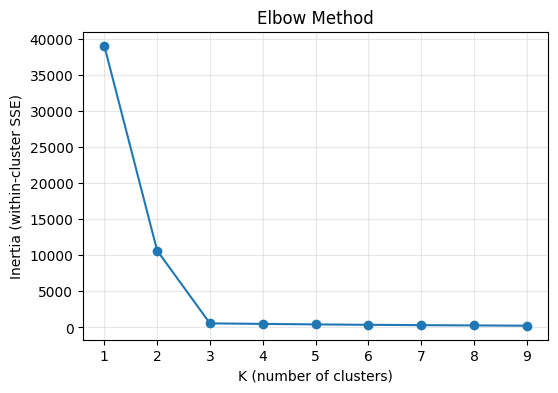

Look for the "elbow" point where reductions slow down.


In [4]:
inertias = []
K_range = range(1, 10)
for K in K_range:
    km = KMeans(n_clusters=K, n_init=10, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(list(K_range), inertias, marker='o')
plt.xticks(list(K_range))
plt.xlabel('K (number of clusters)')
plt.ylabel('Inertia (within-cluster SSE)')
plt.title('Elbow Method')
plt.grid(True, alpha=0.3)
plt.show()

print("Look for the \"elbow\" point where reductions slow down.")


## Another Way: Silhouette Score

- **Idea**: Measures how similar a point is to its own cluster vs. other clusters.
- **Range**: -1 to 1 (higher is better). Values near 1 indicate well-separated clusters.
- **Use**: Try different K and pick the one with highest average silhouette score.


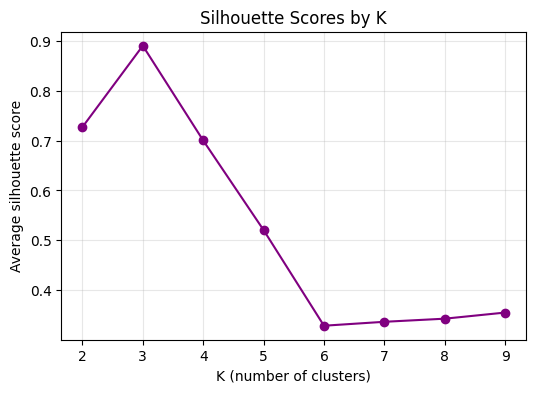

Best K by silhouette score seems to be: 3


In [5]:
sil_scores = []
K_range = range(2, 10)  # silhouette needs at least 2 clusters
for K in K_range:
    km = KMeans(n_clusters=K, n_init=10, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

best_K = list(K_range)[int(np.argmax(sil_scores))]

plt.figure(figsize=(6, 4))
plt.plot(list(K_range), sil_scores, marker='o', color='purple')
plt.xticks(list(K_range))
plt.xlabel('K (number of clusters)')
plt.ylabel('Average silhouette score')
plt.title('Silhouette Scores by K')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Best K by silhouette score seems to be: {best_K}")


## Quick Tips

- **Scale features** before clustering if they are on different ranges (use StandardScaler).
- Use **Elbow** for a quick visual guess; confirm with **Silhouette**.
- Real data may not be perfectly spherical; consider **DBSCAN** or **Gaussian Mixture Models** if K-Means struggles.
- Run K-Means with a reasonable `n_init` (e.g., 10–50) for stable results.


## Putting It Together: Use the Best K
We'll fit K-Means using the best K from the silhouette scores and visualize the result.


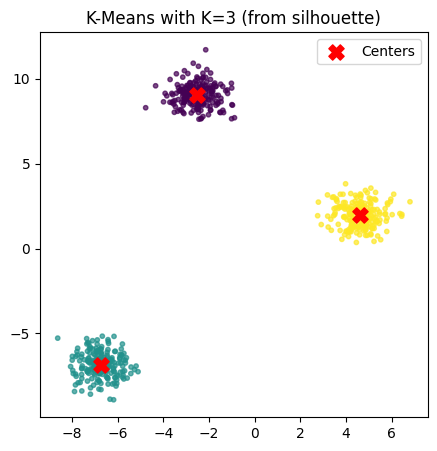

In [6]:
k = best_K
kmeans_best = KMeans(n_clusters=k, n_init=10, random_state=42)
labels_best = kmeans_best.fit_predict(X)
centers_best = kmeans_best.cluster_centers_

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_best, s=10, cmap='viridis', alpha=0.7)
plt.scatter(centers_best[:, 0], centers_best[:, 1], c='red', s=120, marker='X', label='Centers')
plt.title(f"K-Means with K={k} (from silhouette)")
plt.legend()
plt.show()


## Conclusion
- Clustering groups similar points without labels.
- K-Means is simple and fast; choosing K matters.
- Use **Elbow** to spot the diminishing returns, and **Silhouette** for separation quality.
- In practice, combine both methods and domain knowledge.
